# Mermin Peres Magic Square Game

### In order to solve and test the Mirmin Peres Magic Square (MPG) game on a quantum computer, we 
employ the Qiskit framework and the IBM Q-Experience. Subsequently, this notebook will introduce the quantum circuit solving the MPG game, quantify it's performance on both simulated and real devices, and finally provide a step-by-step walkthrough of the mathematical operation applied during an exemplary game.

#### For the subsequent circuit definition, evaluation and illustration, we first have to define auxiliary functions and import the corresponding modules from Qiskit and Numpy

In [1]:
from qiskit import *
import numpy as np
from qiskit.test.mock import *
from qiskit.visualization import plot_state_qsphere

In [2]:
#checks if the circuit output fulfills the winning criteria
def check_result(results, col, row):
    print_tut = True
    for i in results: 
        
        if print_tut:
            explain(i, col, row)
            print_tut = False

        print("Quantum circuit solution")
        print(i+"\n")
        i = np.array(list(i.split())).astype(int)[::-1]
        # bring array in correct i.e. from incoming y2,y1,x2,x1 -> x1,x2,y1,y2
        a = i[0:2]
        a_sum = np.sum(a)
        a3 = int(np.mod(a_sum+1,2))
        a = np.append(a,a3)
        winning_alice = np.mod(a_sum + a3, 2) == 1
        # compute x3 by x1+x2+1 mod 2 and save to array

        b = i[2:]
        b_sum = np.sum(b)
        b3 = int(np.mod(b_sum,2))
        b = np.append(b,b3)
        winning_bob = np.mod(b_sum + b3, 2) == 0   
        # compute y3 by y1+y2 mod 2 and save to array

        # compute overall winning condition -> alice at index of bob's row and vice versa
        print("Alice's selection. Column:"+str(col)+"\n"+str(a.reshape(3,1))+"\n")
        print("Bob's circuit solution. Row:"+str(row)+"\n"+str(b)+"\n")
        
        if(winning_bob & winning_alice & (a[row-1]==b[col-1])):
            #print("Victory!")    
            #print("The following magic square wins the game!")

            expected_states.append(str(i_orginal))
            k = np.empty((3,3,))
            k[:] = np.nan
            k[:,col-1] = a
            k[row-1,:] = b
            print(k)
        else:
            print("The Game is lost!")
        print("------------------------------------------")  
        print("\n")


In [3]:
# function explaining the computation of x3, y3 and presenting the corresponding winning moves
def explain(result, col, row):
    print("Resultant quantum circuit solution:"+"\n")
    print(result+"\n")
    example = np.array(list(result.split())).astype(int)[::-1]
    print("Bring array in correct bit order i.e. from incoming y2,y1,x2,x1 -> x1,x2,y1,y2"+"\n")
    print(str(example)+"\n")
    print("Compute missing x3 with x1+x2+1 mod 2 for Alice and save to array for further processing")
    print("Compute missing y3 with y1+y2 mod 2 for Bob and save to array for further processing"+"\n")
   
    a = example[0:2]
    a_sum = np.sum(a)
    a3 = int(np.mod(a_sum+1,2))
    a = np.append(a,a3)
    winning_alice = np.mod(a_sum + a3, 2) == 1

    b = example[2:]
    b_sum = np.sum(b)
    b3 = int(np.mod(b_sum,2))
    b = np.append(b,b3)
    winning_bob = np.mod(b_sum + b3, 2) == 0   

    print("Alice's column solution"+"\n"+str(a.reshape(3,1))+"\n" + "Winning conditions fullfilled (Odd quantitude of 1)?: "+str(winning_alice)+"\n")
    print("Bob's row solution"+"\n"+str(b)+"\n"+ "Winning conditions fullfilled (Even quantitude of 1)?: "+str(winning_bob)+"\n")
    print("Create matrix to show results"+"\n")
    k = np.empty((3,3,))
    k[:] = np.nan
    k[:,col-1] = a
    k[row-1,:] = b
    print(k)
    print("------------------------------------------")  
    print("------------------------------------------")  

In [4]:
# function to calculate state accuracy
def get_state_accuracy(counts, expected_states, shots): 
    expected_counts = 0
    for state in counts.keys():
        if state in expected_states:
            expected_counts = expected_counts + counts[state]
    state_accuracy = expected_counts / shots
    return str(state_accuracy*100)+"%"

In [5]:
# function that sets up the initial entanglement between Alice and Bob
def share_bell_state(qc,a,b,c,d): 
    qc.h(a)
    qc.h(b)
    qc.cx(a,c)
    qc.cx(b,d)
    
# The following functions represent the U(gamma) and V(gamma) controlled Cliffords.
def U(qc,gamma,a,b):
    if gamma==1:
        qc.h(a)
        qc.i(b)

    elif gamma==2:
        qc.swap(a,b)
        qc.h(a)
        qc.i(b)

    elif gamma==3:
        qc.cx(a,b)
        qc.h(a)
        qc.i(b)

def V(qc,gamma,a,b):
    if gamma==1:
        qc.h(a)
        qc.h(b)

    if gamma==2:
        qc.swap(a,b)

    elif gamma==3:
        qc.z(a)
        qc.z(b)
        qc.cz(a,b)
        qc.h(a)
        qc.h(b)

In [14]:
#We will ask the user to select the row and column on Alice and Bob's behalf.
print("Alice and Bob, select a column or row value of 1, 2, or 3") 
print("Alice choice (column):")
alpha = int(input())
print("Bob choice (row):")
beta = int(input())

#Create the quantum register and the classical register to store our final bit values
aliceQR = QuantumRegister(2)
x1CR = ClassicalRegister(1)
x2CR = ClassicalRegister(1)
bobQR = QuantumRegister(2)
y1CR = ClassicalRegister(1)
y2CR = ClassicalRegister(1)

#Create the circuit
magicsquare_circuit = QuantumCircuit(aliceQR,bobQR,x1CR,x2CR,y1CR,y2CR)

#Generate the Bell state on the circuit
share_bell_state(magicsquare_circuit,0,1,2,3)

magicsquare_circuit.barrier()

#Draw the rest of the circuit based on Alice and Bob's selection   
if 4>alpha>0 and 4>beta>0:
    U(magicsquare_circuit,alpha,0,1) 
    V(magicsquare_circuit,beta,2,3)
    magicsquare_circuit.barrier()
    magicsquare_circuit.measure(0,0)
    magicsquare_circuit.measure(1,1)
    magicsquare_circuit.measure(2,2)
    magicsquare_circuit.measure(3,3)
    
    magicsquare_circuit.draw(output='mpl')
    print(magicsquare_circuit)    

    results_backends = []

    backends = [FakeYorktown(), FakeMelbourne(), FakeVigo(), FakeOurense(), FakeValencia(), FakeLondon(),
                FakeBurlington(), FakeEssex(), BasicAer.get_backend('qasm_simulator')]

    for backend in backends:
        job = execute(magicsquare_circuit, backend,optimization_level=3, shots=8192) # run the job simulation
        results = job.result().get_counts()
        expected_states = check_result(results, alpha, beta)
        state_accuracy = get_state_accuracy(results,expected_states,8192)
        results_backends.append((backend.name(), state_accuracy)) # store results

    print(results_backends)

else:
    print("please enter values of 1, 2, or 3")

Alice and Bob, select a column or row value of 1, 2, or 3
Alice choice (column):
Bob choice (row):
        ┌───┐           ░ ┌───┐ ░ ┌─┐         
q163_0: ┤ H ├──■────────░─┤ H ├─░─┤M├─────────
        ├───┤  │        ░ ├───┤ ░ └╥┘┌─┐      
q163_1: ┤ H ├──┼────■───░─┤ I ├─░──╫─┤M├──────
        └───┘┌─┴─┐  │   ░ ├───┤ ░  ║ └╥┘┌─┐   
q164_0: ─────┤ X ├──┼───░─┤ H ├─░──╫──╫─┤M├───
             └───┘┌─┴─┐ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q164_1: ──────────┤ X ├─░─┤ H ├─░──╫──╫──╫─┤M├
                  └───┘ ░ └───┘ ░  ║  ║  ║ └╥┘
 c20: 1/═══════════════════════════╩══╬══╬══╬═
                                   0  ║  ║  ║ 
                                      ║  ║  ║ 
 c21: 1/══════════════════════════════╩══╬══╬═
                                      0  ║  ║ 
                                         ║  ║ 
 c22: 1/═════════════════════════════════╩══╬═
                                         0  ║ 
                                            ║ 
 c23: 1/════════════════════════════════════╩═
        

# Quantum Circuit of Mermim-Peres-Game

#### Now the circuit modeling the Mirmim Peres game can be created and the user may select the respective column and row that ought to be played. Subsequently, the probability of winning with respect to the game moves of the circuit are shown and evaluated.

#### Indeed, using an ideal quantum simulator, a winning probability of 1 can be achieved, exceeding the highest classical-winning probability of 8/9. Beyond that, however, it is desirable to quantify the results on a real IBM quantum computer, which will be realized in the last section. 

# Mathmatical background of the computation

#### As we have demonstrated above, the quantum circuit solve the Mirmin-Peres game (MPG) on real quantum computers with a higher probability than with any classical strategy on ordinary computers. To shed some light on how and why this works, we present and explain the mathematical operations that lead to the solution of this game. In particular, we will first present a high-level equation describing the mathematical rationale, and we will then take a look at each element of this equation and finally explain it in one go using a concrete example.

#### Recall that the quantum circuit has to play different moves for each different row/column instances of the MPG being selected, since there is no classical strategy that can win the game with probability = 1. Thus, to win with probability 1, the quantum circuit dynamically adapts to the input of each column and row played. Nevertheless, there is indeed one part of the circuit that remains static and is responsible for generating a matching qubit state and we will start of by focusing on that part. Abstractly, then, the quantum circuit can be described by the following formula: (For a technical background on why the gates were applied, see: [Quantum advantage in noisy flat circuits](https://www.nature.com/articles/s41567-020-0948-z)


$$ Quantum Solution MPG = Initial Vector * Dynamic Matrix(row, column)$$


#### Starting with the first part of the equation, the intial vector, of the MPG circuit is defined by quantum gates as follows:

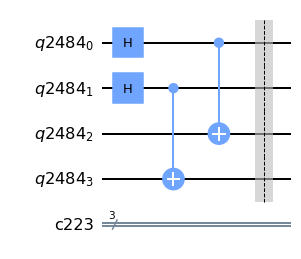

In [403]:
q = QuantumRegister(4) 
c = ClassicalRegister(3) 
qc = QuantumCircuit(q, c) 
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[3])
qc.cx(q[0],q[2])
qc.barrier()
qc.draw(output='mpl')

#### The very starting vector state of the MPG circuit, prior to any quantum gate interaction, corresponds to the Dirac bracket |0000> and is hence described by the following vector: 
$$ = {\begin{pmatrix} 1 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\ 0\end{pmatrix}}$$

$$ 
StaticMatrix =

\begin{bmatrix}\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\end{bmatrix}\ 

⨂

\begin {bmatrix}\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\\end{bmatrix}\

*

\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} ⨂ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} ⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} ⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} 


$$

#### While the static matrix, represented as the quantum gates in the illustration above, is created by the appliance of two CNOT gates to the first and third qubit and the second and fourth qubit, as well as two Hadamard gates applied to the first and second qubit. Mathematically, this is described by the following equation: 

$$ Static Matrix= CNOT_{2|4} ⨂ CNOT_{1|3} * (I ⨂ I ⨂ H ⨂ H) $$

Subsequently inserting the corresponding matrices into this equation results in the following matrix:

$$ 
StaticMatrix =

\begin{bmatrix}\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\end{bmatrix}\
*

\begin{bmatrix}\ \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2}& 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} \\\end{bmatrix}\
$$

$$
=\begin{bmatrix}\ \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2}& 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2}  \\\ \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\end{bmatrix}\
$$

#### The matrix above is the final static matrix for each instance played with the MPG quantum circuit. This matrix can be further reduced by multplication with the, likewise static, inital state vector. Furthermore, this presents us with the Qubits considered for further usage in the dynmic parts of the circuit

$$ = Static Matrix * Inital State $$
$$ 
=
\begin{bmatrix}\ \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2}& 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2}  \\\ \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & \frac 1 {2} & \frac 1 {2}  \\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0  \\\ 0 & 0 & 0 & 0 & \frac 1 {2} & \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\ \frac 1 {2} & -\frac 1 {2} & -\frac 1 {2} & \frac 1 {2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\end{bmatrix}\
*
\frac 1 {\sqrt{2}} {\begin{pmatrix} 1 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\0 \\ 0\end{pmatrix}}
$$

$$ 
= 
\begin{pmatrix} \frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\ 0\\ \frac 1 {2}\end{pmatrix}
$$

#### Then this vector holds the relevant qubits that can be further considered and modified / computed with in the dynmaic part of the circuit, these are:
$$= \frac 1 {2} (|0000\rangle+|0101\rangle+|1010\rangle+|1111\rangle)$$
#### Moreover, due to the nature of matrix multiplication, this vector allows the following simplification. For each row of the first matrix, we only need to consider the numbers marked in red and calculate their product sum with the static vector on the right, as the other positions are multiplied by zero.

$$ = 

\begin{bmatrix}\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\ \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0} & 0 & 0 & 0 & 0 & \color{red}{0}  \\\end{bmatrix}\ 

*

\begin{pmatrix} \frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\ 0\\ \frac 1 {2}\end{pmatrix}
$$

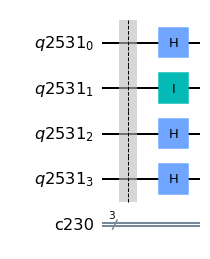

In [439]:
q = QuantumRegister(4) 
c = ClassicalRegister(3) 
qc = QuantumCircuit(q, c) 
#qc.h(q[0])
#qc.h(q[1])
#qc.cx(q[1],q[3])
#qc.cx(q[0],q[2])
qc.barrier()
qc.h(q[0])
qc.id(q[1])
qc.h(q[2])
qc.h(q[3])
qc.draw(output='mpl')

#### Now, in order to consider the later, dynamic, part of the equation we will have to select an example. In this case we have selected row: 1 and column: 1. The corresponding quantum circuit is as follows:

#### The translation of these circuit gates into mathematical matrices is in turn equivalent to the following sequence of operations:
$$ = H ⨂ H ⨂ I ⨂ H $$
$$
= \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} ⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} ⨂ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} ⨂ \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$
$$
DynamicMatrix(1, 1) =
\begin{bmatrix}\ \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  \\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  
\\\
 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} 
\\\ 
\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}   
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} 
\\\
 \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0
  \\\
 \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} 
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}
 \\\ 
\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  
 \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} \\\end{bmatrix}\ 
$$

#### The matrix above is then the one employed when row / column: 1 is selected. In order to now ascertain the winning combinations for that particular game, we have to multiply the dynamic matrix with the static.

 $$
Winning Plays=
\begin{bmatrix}\ \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  \\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  
\\\
 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} 
\\\ 
\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}   
\\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} 
\\\
 \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0
  \\\
 \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} 
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}
 \\\ 
\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0  
\\\ 
\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}& 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0
  \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  
 \\\ 
0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}}  & 0 & 0 & -\frac 1 {\sqrt{8}} & \frac 1 {\sqrt{8}} & 0 & 0 & \frac 1 {\sqrt{8}} & -\frac 1 {\sqrt{8}} \\\end{bmatrix}\ 

*
\begin{pmatrix} \frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\0 \\\frac 1 {2} \\0 \\0 \\0 \\ 0\\ \frac 1 {2}\end{pmatrix}
$$

$$
= \begin{pmatrix} \frac 1 {\sqrt{8}} \\0 \\\frac 1 {\sqrt{8}} \\0 \\0 \\\frac 1 {\sqrt{8}}  \\0 \\\frac 1 {\sqrt{8}}  \\\frac 1 {\sqrt{8}}  \\0 \\ -\frac 1 {\sqrt{8}}  \\0 \\0 \\\frac 1 {\sqrt{8}}  \\ 0\\ -\frac 1 {\sqrt{8}} \end{pmatrix}
$$


#### Finally, this vector contains the qubits that can be played to win the game with probability 1, these are:

$$= \frac 1 {8} (|0000\rangle+|0100\rangle+|0101\rangle+|01111\rangle+|1000\rangle)+|1011\rangle)+|1101\rangle)+|1111\rangle)$$

#### To validate these mathematical results, we will run the quantum circuit in one go and compare the respective qubit results

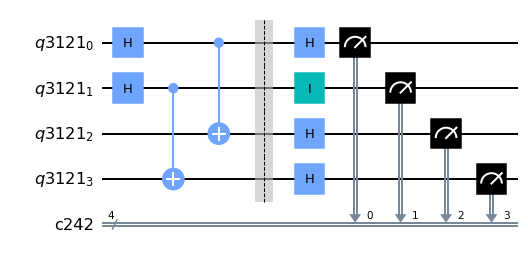

In [460]:
q = QuantumRegister(4) 
c = ClassicalRegister(4) 
qc = QuantumCircuit(q, c) 
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[3])
qc.cx(q[0],q[2])
qc.barrier()
qc.h(q[0])
qc.id(q[1])
qc.h(q[2])
qc.h(q[3])
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw(output='mpl')

In [457]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend,shots=8192).result().get_counts()
expected_states = check_result(results, 1, 1)
state_accuracy = get_state_accuracy(results,expected_states,8192)
print(result)
print("Accuracy: "+state_accuracy)

{'0000': 1027, '0010': 1062, '0101': 1032, '0111': 993, '1000': 1047, '1010': 1046, '1101': 975, '1111': 1010}
Accuracy: 100.0%


#### Evidently, the results of the mathematical calculation match those of the circuit and a win rate of 100% is achieved!

# Circuit Performance on Real Quantum Devices

#### Here we evaluate the performance of the ibmq_athens. Please note that you will have to add your own API token from the IBM Quantum website (https://quantum-computing.ibm.com)

In [53]:
IBMQ.save_account('YOUR_API_TOKEN') # retrieve from your IBM-Account: https://quantum-computing.ibm.com

configrc.store_credentials:WARNING:2021-03-15 09:28:25,642: Credentials already present. Set overwrite=True to overwrite.


In [392]:
# load IBM Quantum Experience account 
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q') # get provider

In [393]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [394]:
backend = provider.get_backend("ibmq_athens")

In [395]:
job = execute(magicsquare_circuit, backend,optimization_level=3, shots=8192) # run the job simulation with the highest compilter optimsation
results = job.result().get_counts()
expected_states = check_result(results, alpha, beta)
state_accuracy = get_state_accuracy(results,expected_states,8192)

In [396]:
state_accuracy

'96.69189453125%'

#### Evidently, the MPG circuit outperforms the classical circuit by about 7.8% (88.89% vs. 96.69%) on a real, noisy, quantum computer.